In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import glob
import os

In [18]:
joined_files = os.path.join("./experiment_data/", "*.csv")
joined_list = glob.glob(joined_files)
df = pd.concat(map(pd.read_csv, joined_list), ignore_index=True)

In [19]:
# adding column if identified emotion is correct
df['Correct'] = 0
df.loc[df['True emotion'] == df['Response emotion'], 'Correct'] = 100

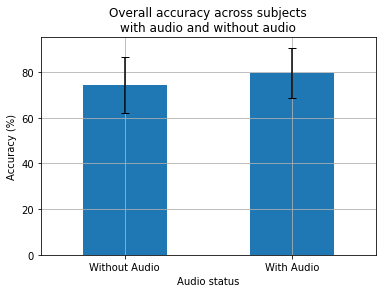

In [20]:
#==============================================
# ACCURACY FOR AUDIO vs WITHOUT AUDIO
# group by audio presence
dfGrSub = df[['Audio', 'Subject Name', 'Correct']].groupby(['Audio', 'Subject Name']).mean()
plotdf = pd.DataFrame({
    'Without Audio': dfGrSub.loc[0]['Correct'], 
    'With Audio': dfGrSub.loc[1]['Correct']
})
# print(plotdf)
# plot for mean for both cases with standard deviation
fig1, ax1 = plt.subplots(1, 1)
plotdf.mean().plot.bar(
    ax=ax1, 
    yerr=plotdf.std(), 
    rot=0, 
    capsize=4, 
    legend=False, 
    xlabel='Audio status', 
    ylabel='Accuracy (%)', 
    title='Overall accuracy across subjects\nwith audio and without audio'
)
ax1.grid()

In [21]:
adt = plotdf['With Audio']
adf = plotdf['Without Audio']
print("tru variance: {}, false variance: {}".format(adt.std(), adf.std()))
print("Homegeneity test on only audio category: {}".format(stats.levene(adt, adf)))
print("Normality test on only audio category: {}, {}".format(stats.shapiro(adt), stats.shapiro(adf)))
print("T-Test result on only audio category: {}".format(stats.ttest_ind(adt, adf, equal_var=False)))

tru variance: 10.970587058982554, false variance: 12.38637459634681
Homegeneity test on only audio category: LeveneResult(statistic=0.07035267613392555, pvalue=0.793088918289289)
Normality test on only audio category: ShapiroResult(statistic=0.8874057531356812, pvalue=0.08990927040576935), ShapiroResult(statistic=0.7893745303153992, pvalue=0.005111332517117262)
T-Test result on only audio category: Ttest_indResult(statistic=1.1582777689904034, pvalue=0.25831158103103)


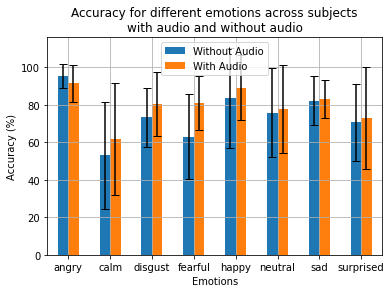

In [22]:
#==============================================
# ACCURACY FOR DIFFERENT EMOTIONS FOR AUDIO vs WITHOUT AUDIO
# group by each emotion, audio
dfGrEm = df[['True emotion', 'Audio', 'Subject Name', 'Correct']].groupby(['True emotion', 'Audio', 'Subject Name']).mean()
dfGrEm = dfGrEm.reset_index(['Audio', 'Subject Name'])
af = dfGrEm[dfGrEm['Audio']==False]
at = dfGrEm[dfGrEm['Audio']==True]
plotdfE = pd.DataFrame({
    'Without Audio': af['Correct'],
    'With Audio': at['Correct']
})
plotdfGE = plotdfE.groupby(['True emotion'])
# plot for mean for both cases for each emotion with standard deviation
fig2, ax2 = plt.subplots(1, 1)
plotdfGE.mean().plot.bar(
    ax=ax2, 
    yerr=plotdfGE.std(), 
    rot=0, 
    capsize=4, 
    xlabel='Emotions', 
    ylabel='Accuracy (%)', 
    title='Accuracy for different emotions across subjects\nwith audio and without audio'
)
ax2.grid()

In [23]:
adt = plotdfGE['With Audio']
adf = plotdfGE['Without Audio']
# tests for angry
angt = adt.get_group('angry')
angf = adf.get_group('angry')
print("angry:")
print("tru variance: {}, false variance: {}".format(angt.std(), angf.std()))
print("Homegeneity test: {}".format(stats.levene(angt, angf)))
print("Normality test: {}, {}".format(stats.shapiro(angt), stats.shapiro(angf)))
print("T-Test result: {}".format(stats.ttest_ind(angt, angf, equal_var=False)))
print("")

angry:
tru variance: 9.87096233585649, false variance: 6.602252917735248
Homegeneity test: LeveneResult(statistic=1.5483870967741944, pvalue=0.22538935354452963)
Normality test: ShapiroResult(statistic=0.8163204193115234, pvalue=0.010722882114350796), ShapiroResult(statistic=0.7092480063438416, pvalue=0.0006877121631987393)
T-Test result: Ttest_indResult(statistic=-1.1677484162422869, pvalue=0.2560292184597811)



In [24]:
# tests for calm
angt = adt.get_group('calm')
angf = adf.get_group('calm')
print("calm:")
print("Homegeneity test: {}".format(stats.levene(angt, angf)))
print("Normality test: {}, {}".format(stats.shapiro(angt), stats.shapiro(angf)))
print("T-Test result: {}".format(stats.ttest_ind(angt, angf)))
print("")

calm:
Homegeneity test: LeveneResult(statistic=0.0005223750652968892, pvalue=0.9819544841387401)
Normality test: ShapiroResult(statistic=0.8316736221313477, pvalue=0.0166251789778471), ShapiroResult(statistic=0.8216946721076965, pvalue=0.012484882026910782)
T-Test result: Ttest_indResult(statistic=0.7522671834066366, pvalue=0.4592054237050006)



In [25]:
# tests for disgust
angt = adt.get_group('disgust')
angf = adf.get_group('disgust')
print("disgust:")
print("Homegeneity test: {}".format(stats.levene(angt, angf)))
print("Normality test: {}, {}".format(stats.shapiro(angt), stats.shapiro(angf)))
print("T-Test result: {}".format(stats.ttest_ind(angt, angf)))
print("")

disgust:
Homegeneity test: LeveneResult(statistic=0.09789314398789438, pvalue=0.7570754100477727)
Normality test: ShapiroResult(statistic=0.6322174072265625, pvalue=0.0001260282879229635), ShapiroResult(statistic=0.931649923324585, pvalue=0.35811832547187805)
T-Test result: Ttest_indResult(statistic=1.1143420667632695, pvalue=0.27616788956425686)



In [26]:
# tests for fearful
angt = adt.get_group('fearful')
angf = adf.get_group('fearful')
print("fearful:")
print("Homegeneity test: {}".format(stats.levene(angt, angf)))
print("Normality test: {}, {}".format(stats.shapiro(angt), stats.shapiro(angf)))
print("T-Test result: {}".format(stats.ttest_ind(angt, angf)))
print("")

fearful:
Homegeneity test: LeveneResult(statistic=0.6242774566473989, pvalue=0.437199873903817)
Normality test: ShapiroResult(statistic=0.913819432258606, pvalue=0.20679634809494019), ShapiroResult(statistic=0.817992091178894, pvalue=0.011240755207836628)
T-Test result: Ttest_indResult(statistic=2.3597502097958545, pvalue=0.026759403132979715)



In [27]:
# tests for happy
angt = adt.get_group('happy')
angf = adf.get_group('happy')
print("happy:")
print("Homegeneity test: {}".format(stats.levene(angt, angf)))
print("Normality test: {}, {}".format(stats.shapiro(angt), stats.shapiro(angf)))
print("T-Test result: {}".format(stats.ttest_ind(angt, angf)))
print("")

happy:
Homegeneity test: LeveneResult(statistic=0.03443328550932567, pvalue=0.854347549420424)
Normality test: ShapiroResult(statistic=0.6850986480712891, pvalue=0.0003953012346755713), ShapiroResult(statistic=0.5773612856864929, pvalue=4.2031715565826744e-05)
T-Test result: Ttest_indResult(statistic=0.6088875184204984, pvalue=0.5483196581485557)



In [28]:
# tests for neutral
angt = adt.get_group('neutral')
angf = adf.get_group('neutral')
print("neutral:")
print("Homegeneity test: {}".format(stats.levene(angt, angf)))
print("Normality test: {}, {}".format(stats.shapiro(angt), stats.shapiro(angf)))
print("T-Test result: {}".format(stats.ttest_ind(angt, angf)))
print("")

neutral:
Homegeneity test: LeveneResult(statistic=0.021404682274247487, pvalue=0.8849038466874011)
Normality test: ShapiroResult(statistic=0.783696174621582, pvalue=0.0043923817574977875), ShapiroResult(statistic=0.8902366757392883, pvalue=0.09827741235494614)
T-Test result: Ttest_indResult(statistic=0.1937356757655729, pvalue=0.8480132291127299)



In [29]:
# tests for sad
angt = adt.get_group('sad')
angf = adf.get_group('sad')
print("sad:")
print("Homegeneity test: {}".format(stats.levene(angt, angf)))
print("Normality test: {}, {}".format(stats.shapiro(angt), stats.shapiro(angf)))
print("T-Test result: {}".format(stats.ttest_ind(angt, angf)))
print("")

sad:
Homegeneity test: LeveneResult(statistic=0.7680000000000005, pvalue=0.389524015116711)
Normality test: ShapiroResult(statistic=0.888379693031311, pvalue=0.09270250052213669), ShapiroResult(statistic=0.8848075270652771, pvalue=0.08287256956100464)
T-Test result: Ttest_indResult(statistic=0.16705381391691232, pvalue=0.8687272673740206)



In [30]:
# tests for surprised
angt = adt.get_group('surprised')
angf = adf.get_group('surprised')
print("surprised:")
print("Homegeneity test: {}".format(stats.levene(angt, angf)))
print("Normality test: {}, {}".format(stats.shapiro(angt), stats.shapiro(angf)))
print("T-Test result: {}".format(stats.ttest_ind(angt, angf)))
print("")

surprised:
Homegeneity test: LeveneResult(statistic=0.23076923076923073, pvalue=0.6353038276176826)
Normality test: ShapiroResult(statistic=0.8233336210250854, pvalue=0.013081619516015053), ShapiroResult(statistic=0.8971595168113708, pvalue=0.12225094437599182)
T-Test result: Ttest_indResult(statistic=0.24386751657153205, pvalue=0.8094060316321462)



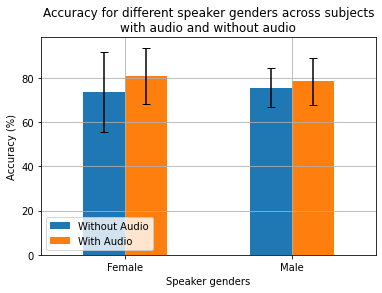

In [31]:
#==============================================
# ACCURACY FOR DIFFERENT SPEAKER GENDERS FOR AUDIO vs WITHOUT AUDIO
# group by each speaker gender, audio
dfGrSpG = df[['Speaker gender', 'Audio', 'Subject Name', 'Correct']].groupby(['Speaker gender', 'Audio', 'Subject Name']).mean()
dfGrSpG = dfGrSpG.reset_index(['Audio', 'Subject Name'])
af = dfGrSpG[dfGrSpG['Audio']==False]
at = dfGrSpG[dfGrSpG['Audio']==True]
plotdfSpG = pd.DataFrame({
    'Without Audio': af['Correct'],
    'With Audio': at['Correct']
})
plotdfSpG = plotdfSpG.groupby(['Speaker gender'])
# plot for mean for both cases for each speaker gender with standard deviation
fig3, ax3 = plt.subplots(1, 1)
plotdfSpG.mean().plot.bar(
    ax=ax3, 
    yerr=plotdfSpG.std(), 
    rot=0, 
    capsize=4, 
    xlabel='Speaker genders', 
    ylabel='Accuracy (%)', 
    title='Accuracy for different speaker genders across subjects\nwith audio and without audio'
)
ax3.grid()

In [32]:
adt = plotdfSpG['With Audio']
adf = plotdfSpG['Without Audio']
# tests for speaker
angt = adt.get_group('Female')
angf = adf.get_group('Female')
print("Female:")
print("Homegeneity test: {}".format(stats.levene(angt, angf)))
print("Normality test: {}, {}".format(stats.shapiro(angt), stats.shapiro(angf)))
print("T-Test result: {}".format(stats.ttest_ind(angt, angf)))
print("")

Female:
Homegeneity test: LeveneResult(statistic=0.008852722106751768, pvalue=0.9258196486404047)
Normality test: ShapiroResult(statistic=0.9361256957054138, pvalue=0.4087277948856354), ShapiroResult(statistic=0.674393355846405, pvalue=0.0003113219572696835)
T-Test result: Ttest_indResult(statistic=1.2022744945362969, pvalue=0.24098559528106372)



In [33]:
adt = plotdfSpG['With Audio']
adf = plotdfSpG['Without Audio']
# tests for male speaker
angt = adt.get_group('Male')
angf = adf.get_group('Male')
print("Male:")
print("Homegeneity test: {}".format(stats.levene(angt, angf)))
print("Normality test: {}, {}".format(stats.shapiro(angt), stats.shapiro(angf)))
print("T-Test result: {}".format(stats.ttest_ind(angt, angf)))
print("")

Male:
Homegeneity test: LeveneResult(statistic=0.09952809192795777, pvalue=0.7551236276613)
Normality test: ShapiroResult(statistic=0.9625934958457947, pvalue=0.7931432127952576), ShapiroResult(statistic=0.9138349890708923, pvalue=0.20689721405506134)
T-Test result: Ttest_indResult(statistic=0.7796430344867163, pvalue=0.4432219744725431)



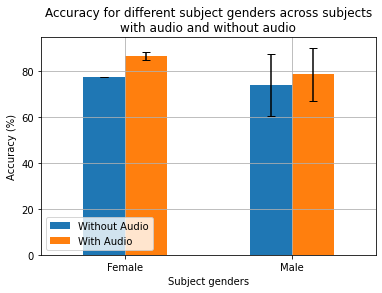

In [34]:
#==============================================
# ACCURACY FOR DIFFERENT SUBJECT GENDERS FOR AUDIO vs WITHOUT AUDIO
# group by each subject gender, audio
dfGrSbG = df[['Subject gender', 'Audio', 'Subject Name', 'Correct']].groupby(['Subject gender', 'Audio', 'Subject Name']).mean()
dfGrSbG = dfGrSbG.reset_index(['Audio', 'Subject Name'])
af = dfGrSbG[dfGrSbG['Audio']==False]
at = dfGrSbG[dfGrSbG['Audio']==True]
plotdfSbG = pd.DataFrame({
    'Without Audio': af['Correct'],
    'With Audio': at['Correct']
})
plotdfSbG = plotdfSbG.groupby(['Subject gender'])
# plot for mean for both cases for each subject gender with standard deviation
fig4, ax4 = plt.subplots(1, 1)
plotdfSbG.mean().plot.bar(
    ax=ax4, 
    yerr=plotdfSbG.std(), 
    rot=0, 
    capsize=4, 
    xlabel='Subject genders', 
    ylabel='Accuracy (%)', 
    title='Accuracy for different subject genders across subjects\nwith audio and without audio'
)
ax4.grid()

In [35]:
adt = plotdfSbG['With Audio']
adf = plotdfSbG['Without Audio']
# tests for female subject
angt = adt.get_group('Female')
angf = adf.get_group('Female')
print("Female:")
print("Homegeneity test: {}".format(stats.levene(angt, angf)))
print("Normality test: {}, {}".format(stats.shapiro(angt), stats.shapiro(angf)))
print("T-Test result: {}".format(stats.ttest_ind(angt, angf)))
print("")

Female:
Homegeneity test: LeveneResult(statistic=inf, pvalue=0.0)


C:\D Drive\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2603: RuntimeWarning: divide by zero encountered in double_scalars
  W = numer / denom


ValueError: Data must be at least length 3.

In [ ]:
adt = plotdfSbG['With Audio']
adf = plotdfSbG['Without Audio']
# tests for male subject
angt = adt.get_group('Male')
angf = adf.get_group('Male')
print("Male:")
print("Homegeneity test: {}".format(stats.levene(angt, angf)))
print("Normality test: {}, {}".format(stats.shapiro(angt), stats.shapiro(angf)))
print("T-Test result: {}".format(stats.ttest_ind(angt, angf)))
print("")